### Improting Libraries

In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

### Load the Dataset

In [43]:
mushroom_df = pd.read_csv("mushrooms.csv") # Load the dataset
mushroom_df.head() # display the first rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data inspection

In [44]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [45]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [46]:
mushroom_df.shape

(8124, 23)

### Data Preprocessing

In [47]:
mushroom_df.isnull().sum() # Check for missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [48]:
#duplicate
mushroom_df.duplicated().sum() # Check for duplicate values

0

#### Visualizations

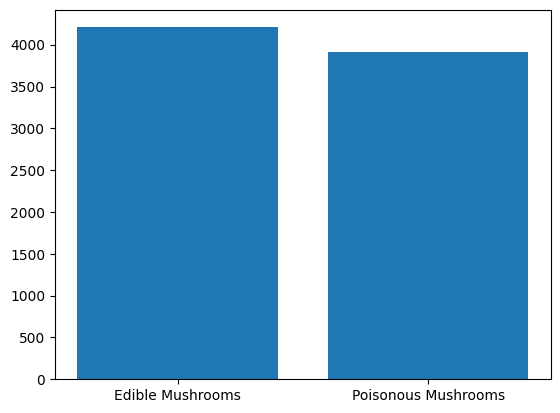

In [49]:
# bar plot to visulize count of edible and poisonous mushrooms
plt.bar(['Edible Mushrooms','Poisonous Mushrooms'], mushroom_df['class'].value_counts().values.tolist())
plt.show()

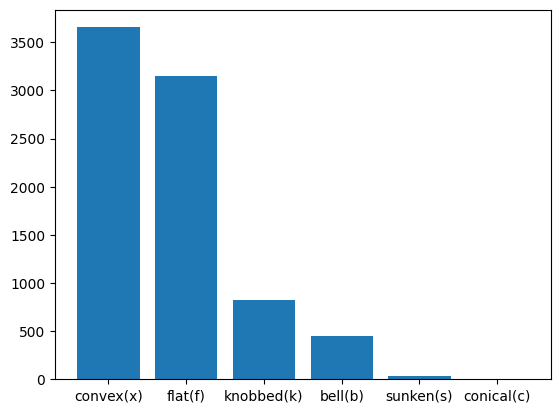

In [50]:
# Bar plot to visualize the count of different cap shapes
labels = ['convex(x)','flat(f)','knobbed(k)','bell(b)','sunken(s)','conical(c)']
plt.bar(labels, mushroom_df['cap-shape'].value_counts().values.tolist())
plt.show()

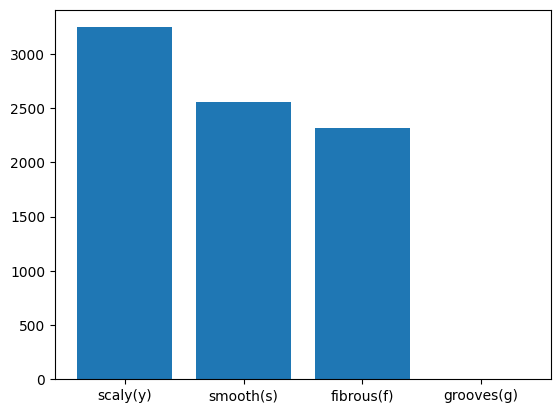

In [51]:
# Bar plot to visualize the count of different cap surfaces
labels = ['scaly(y)','smooth(s)','fibrous(f)','grooves(g)']
plt.bar(labels, mushroom_df['cap-surface'].value_counts().values.tolist())
plt.show()

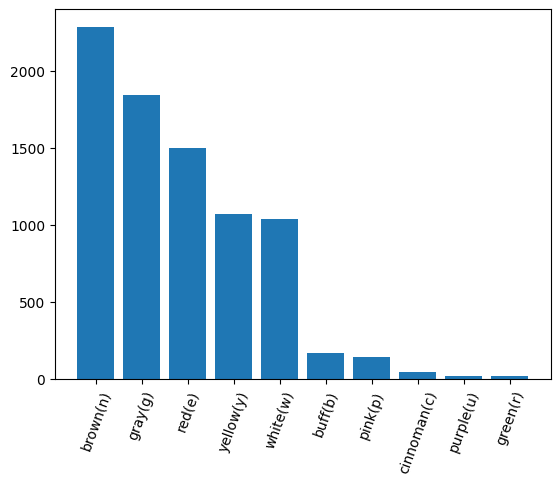

In [52]:
# Bar plot to visualize the count of different cap color
labels = ['brown(n)','gray(g)','red(e)','yellow(y)','white(w)','buff(b)','pink(p)','cinnoman(c)','purple(u)','green(r)']
plt.bar(labels, mushroom_df['cap-color'].value_counts().values.tolist())
plt.xticks(rotation=70)
plt.show()

#### Feature Engineering

In [53]:
# Checking for data types
mushroom_df = mushroom_df.astype('category')
mushroom_df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [54]:
# Since all the data are categorical-nomial, using a label encoder to transform them into numerical values
labelencoder=LabelEncoder()
df = mushroom_df.copy()
for column in mushroom_df.columns:
    df[column] = labelencoder.fit_transform(mushroom_df[column])

In [55]:
df.head() # Data inspection after label encoding

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [56]:
df['veil-type'] # inspecting veil type

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [57]:
df = df.drop(["veil-type"],axis=1) # Dropping veil type since everything is same in veil type

In [58]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


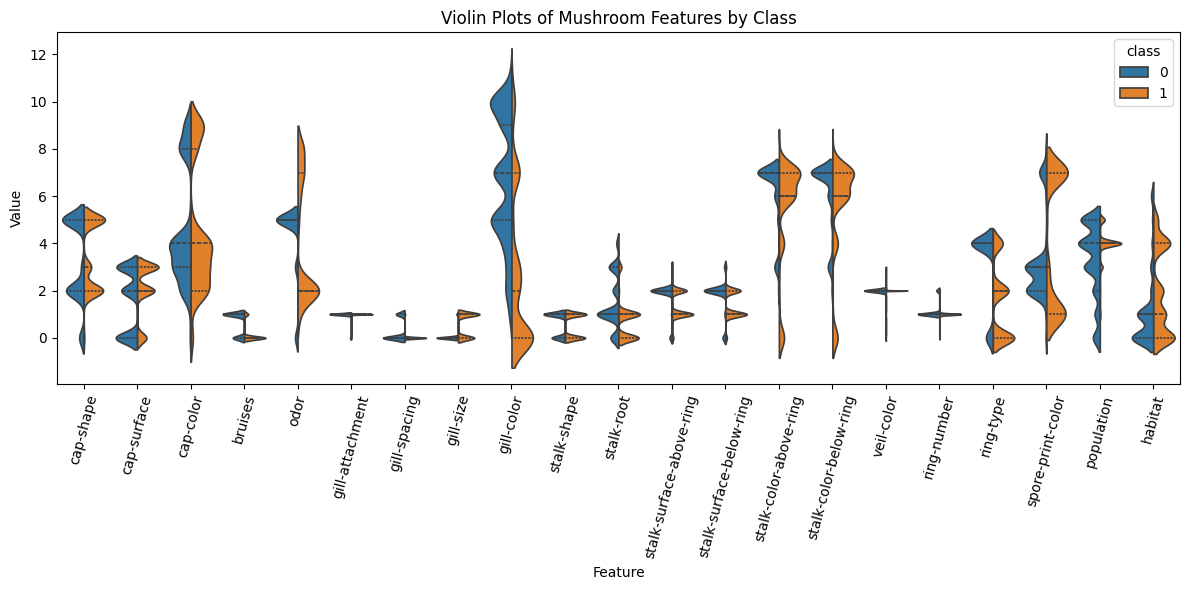

In [59]:
#distribution of the classification characteristics
feature_to_plot = df.select_dtypes(include=['int32']).columns
df_v = pd.melt(df, id_vars=['class'], value_vars=feature_to_plot, var_name='Feature', value_name='Value')
plt.figure(figsize=(12, 6))
sns.violinplot(x='Feature', y='Value', hue='class', data=df_v, split=True, inner='quart', density_norm='width')

plt.title('Violin Plots of Mushroom Features by Class')
plt.xticks(rotation=75) # Rotate the x labels to make them more readable
plt.tight_layout() # Adjust the layout to make room for the rotated labels
plt.show()

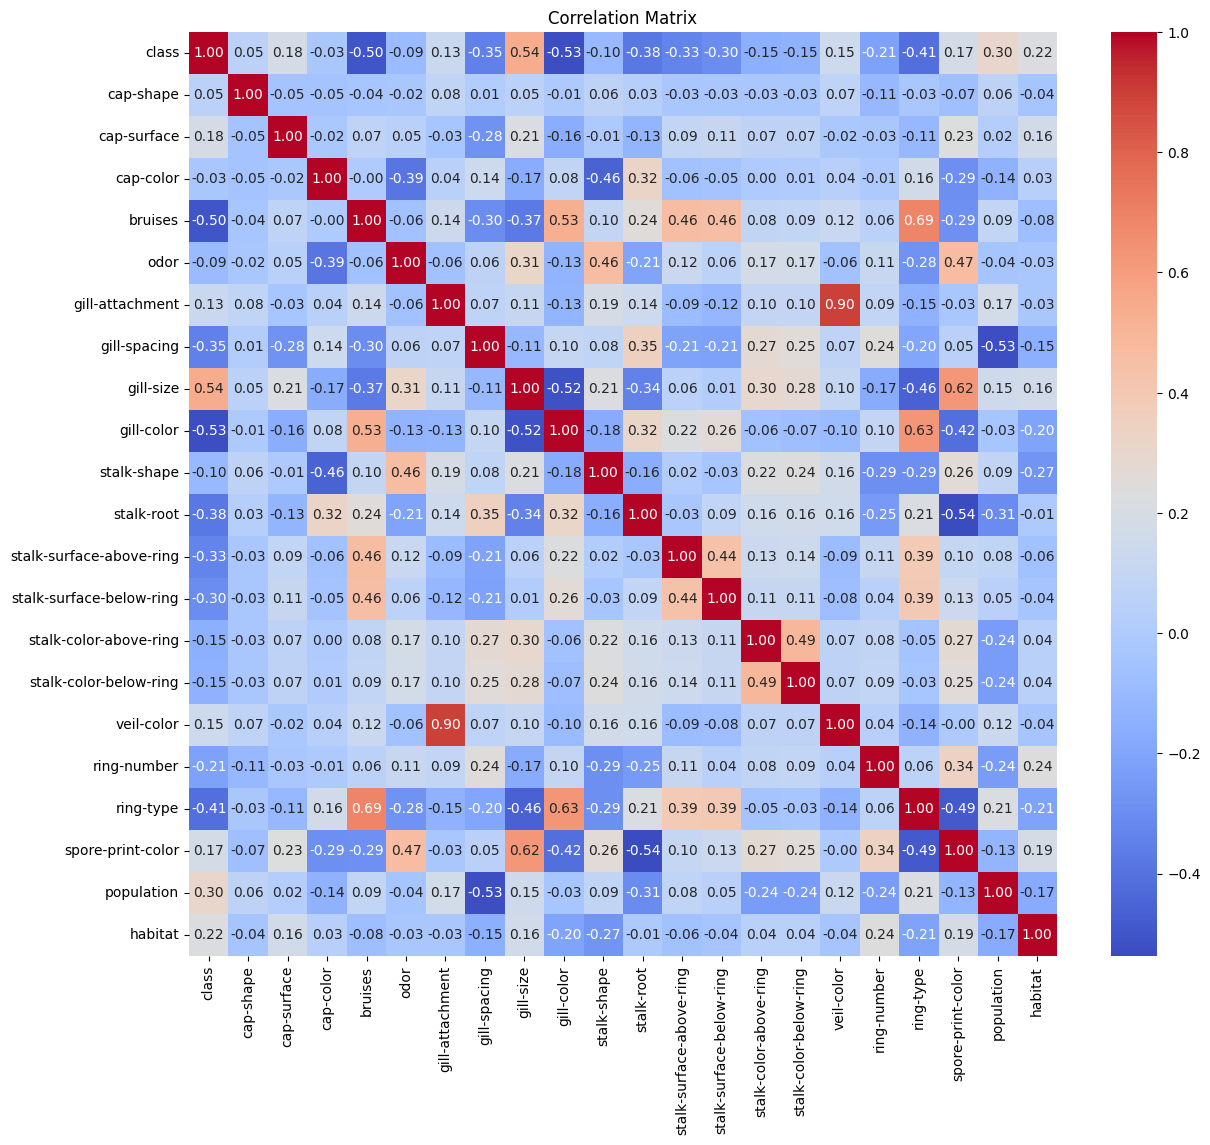

In [60]:
# Correlation between the variable
corr_matrix = df[feature_to_plot].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

C:\Users\robbi\AppData\Local\Temp\ipykernel_11028\1087358224.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='magma')


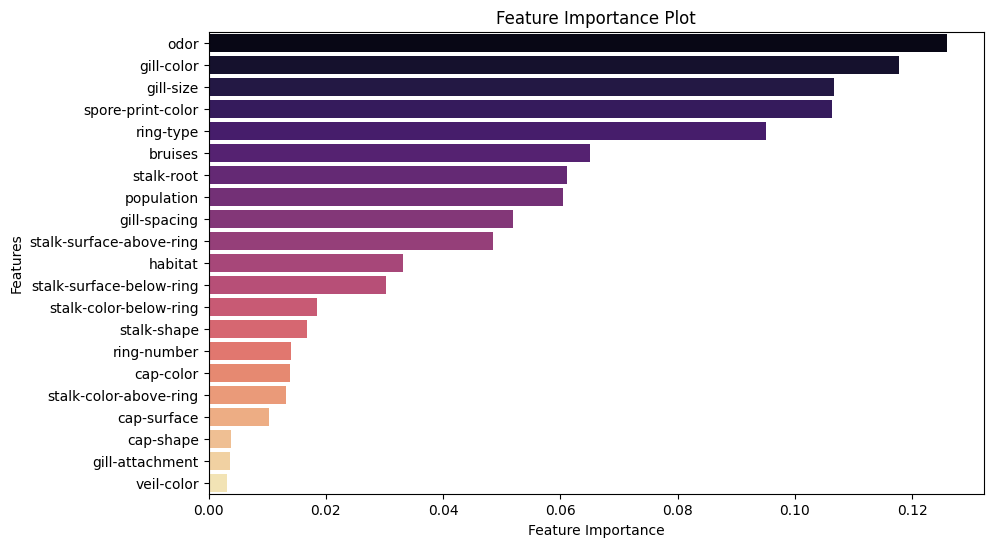

In [61]:
# calculating feature importance using random forest classifier
X = df.drop('class', axis=1)
y = df['class']

clf = RandomForestClassifier()
clf.fit(X, y)

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='magma')
plt.title('Feature Importance Plot')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

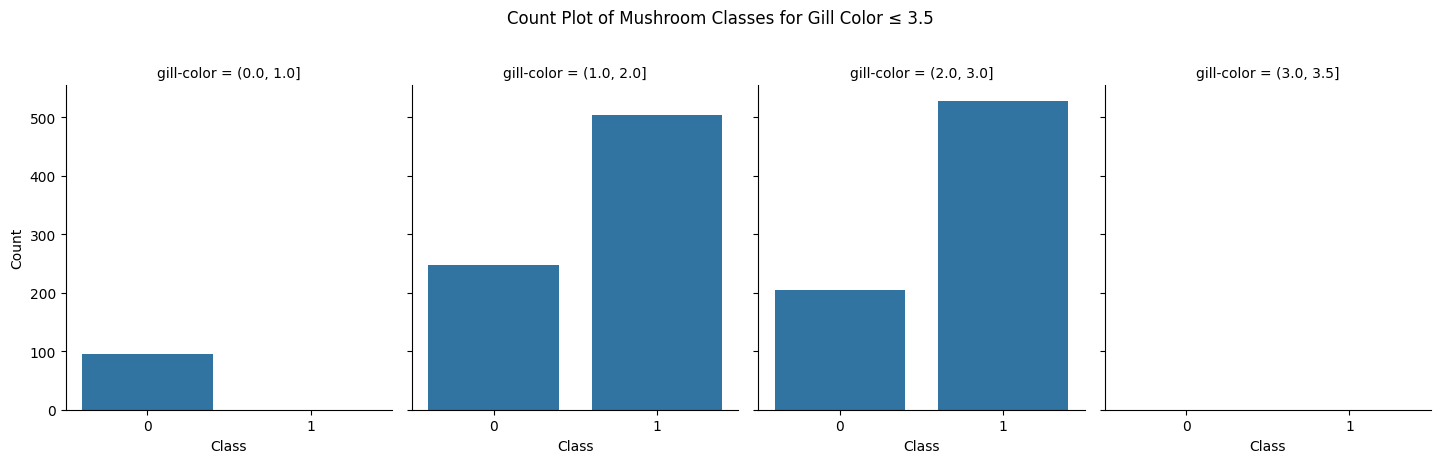

In [62]:
# Select the relevant columns and apply the condition to 'gill-color'
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 3.5]

# Convert 'gill-color' into a categorical variable that represents binned groups
# This step assumes you have a reasonable number of unique values in 'gill-color'
# Otherwise, you'll get too many columns in your grid plot
new_var['gill-color'] = pd.cut(new_var['gill-color'], bins=[0, 1, 2, 3, 3.5])

# Create a grid of count plots
g = sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4)

# Set titles and labels (optional, for customization)
g.fig.suptitle('Count Plot of Mushroom Classes for Gill Color ≤ 3.5', y=1.02)
g.set_axis_labels("Class", "Count")

# Adjust the spacing of the plots
plt.tight_layout()

# Show the plot
plt.show()


#### Model Building

In [63]:
# using chi-square test to select best 10 features
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features

Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

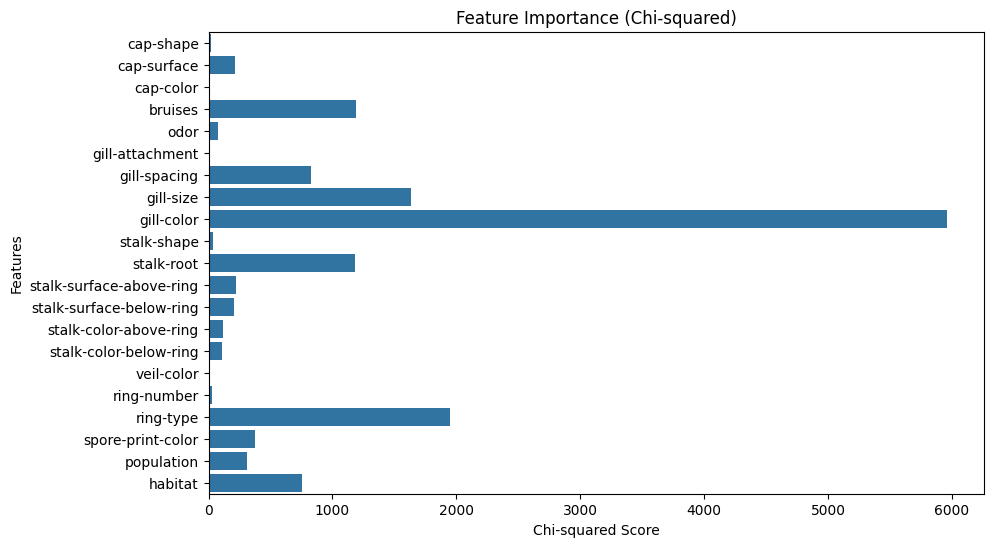

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=selector.scores_, y=X.columns)
plt.title('Feature Importance (Chi-squared)')
plt.xlabel('Chi-squared Score')
plt.ylabel('Features')
plt.show()

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9321434066779505
Testing Accuracy: 0.9316923076923077

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       843
           1       0.94      0.92      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



In [66]:
new_data = [[5.1, 3.5, 1.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.1],
            [6.2, 2.9, 4.3, 1.3, 0.5, 0.3, 0.4, 0.3, 0.6, 0.2]]
new_data_scaled = scaler.transform(new_data)
new_predictions = logistic_model.predict(new_data_scaled)
predicted_labels = ['Poisonous' if prediction == 1 else 'Edible' for prediction in new_predictions]
for i, prediction in enumerate(predicted_labels):
    print("Sample {} Predicted Class: {}".format(i+1, prediction))

Sample 1 Predicted Class: Poisonous
Sample 2 Predicted Class: Poisonous


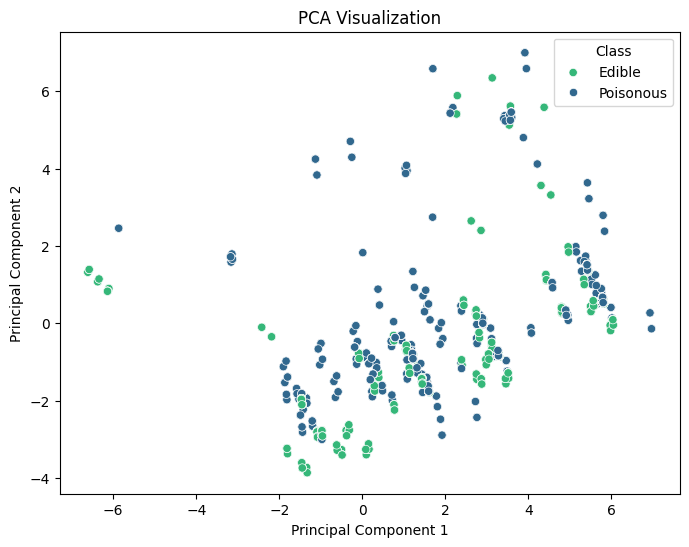

In [77]:
# dimensionality reduction with principal component analysis
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

In [78]:
# Building pipeline with PCA and logistic regression
pipe = Pipeline([
    ('pca', PCA(n_components=10)),  # Dimensionality reduction using PCA
    ('logistic', LogisticRegression())  # Logistic Regression
])
pipe.fit(X_train, y_train)
y_pred_test = pipe.predict(X_test)

# Evaluate the model
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Testing Accuracy: 0.9316923076923077

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       843
           1       0.94      0.92      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



In [79]:
# Sample prediction for entirely new data
new_data_pca = pca.transform(new_data_scaled)  # Apply PCA transformation
new_predictions_pca = pipe.predict(new_data_scaled)  # Predict using the pipeline
predicted_labels_pca = ['Poisonous' if prediction == 1 else 'Edible' for prediction in new_predictions_pca]

# Print the predictions
for i, prediction in enumerate(predicted_labels_pca):
    print("Sample {} Predicted Class (with PCA): {}".format(i+1, prediction))

Sample 1 Predicted Class (with PCA): Poisonous
Sample 2 Predicted Class (with PCA): Poisonous
